
DATA COPIED SUCESSFULLY  
     v1                                                 v2 Unnamed: 2  \
0  ham  Go until jurong point, crazy.. Available only ...        NaN   
1  ham                      Ok lar... Joking wif u oni...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  


RENAMED SUCESSFULLY  
   Label                                               Text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...


PLOTING BAR GRAPH ON COUNT v/s LABEL 
 



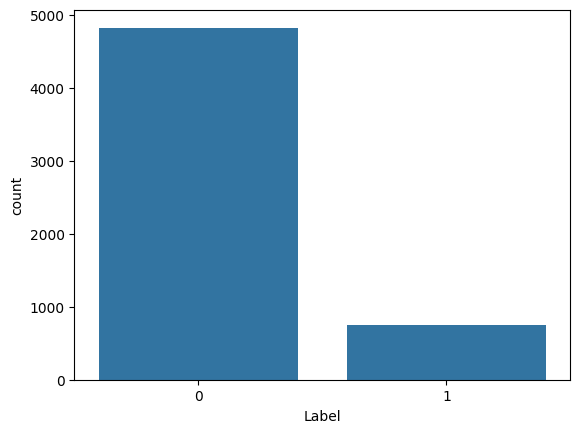


AVERAGE WORD LENGTH IS:-  15 

TOTAL WORD LENGTH IS:- 15585 



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow_hub as hub

# Load and preprocess the dataset
raw_data = pd.read_csv('C:/Users/Lenovo/Desktop/DATA ANALYSIS Practice/spam.csv', encoding='latin-1')
raw_data.head()

#Creating copy of original data
data=raw_data.copy()
print("DATA COPIED SUCESSFULLY  \n",data.head(2))

# Selecting only the columns with SMS text and labels
data = data[['v1', 'v2']]  

# Renaming the columns for clarity
data.columns = ['Label', 'Text']  
print("\n\nRENAMED SUCESSFULLY  \n",data.head(2))

# Encoding labels
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})

#DISPLAY PLOT
print("\n\nPLOTING BAR GRAPH ON COUNT v/s LABEL \n \n")
sns.countplot(x=data['Label'])
plt.show()

avg_word_length=round(sum([len(i.split()) for i in data['Text']])/len(data['Text']))
print("\nAVERAGE WORD LENGTH IS:- ",avg_word_length,"\n")

s=set()
for sent in data['Text']:
    for word in sent.split():
        s.add(word)
total_word_length=len(s)
print("TOTAL WORD LENGTH IS:-",total_word_length,"\n")

In [2]:
from sklearn.model_selection import train_test_split

X,y=np.asanyarray(data['Text']), np.asanyarray(data['Label'])
data=pd.DataFrame({'Text':X,'Label':y})
X_train,X_test,y_train,y_test = train_test_split(data['Text'],data['Label'],test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score
 
tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)
 
base_model = MultinomialNB()
base_model.fit(X_train_vec,y_train)

nb_accuracy=accuracy_score(y_test,base_model.predict(X_test_vec))
print(nb_accuracy)
print("\n\nCLASSIFICATION REPORT: \n\n",classification_report(y_test,base_model.predict(X_test_vec)))

from tensorflow.keras.layers import TextVectorization

MAXTOKENS=total_word_length
OUTPUTLEN=avg_word_length
print("\n\nTHIS IS MODEL SUMMERY\n")
text_vec = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)
text_vec.adapt(X_train)
sample_sentence = "this is a message"
text_vec([sample_sentence])

embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)

input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)
 
model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
    label_smoothing=0.5), metrics=['accuracy'])
model_1.summary()


0.9623318385650225


CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



THIS IS MODEL SUMMERY



C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,994,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,999,041 (7.63 MB)

 Trainable params: 1,999,041 (7.63 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
#  Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Label'], test_size=0.2, random_state=42)

# Tokenization and Padding
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Building the model
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Training the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.8888 - loss: 0.3230 - val_accuracy: 0.9740 - val_loss: 0.0845
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9865 - loss: 0.0521 - val_accuracy: 0.9794 - val_loss: 0.0675
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.9950 - loss: 0.0299 - val_accuracy: 0.9803 - val_loss: 0.0708
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9985 - loss: 0.0115 - val_accuracy: 0.9794 - val_loss: 0.0736
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9976 - loss: 0.0132 - val_accuracy: 0.9767 - val_loss: 0.0795
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9799 - loss: 0.0703
Test Accuracy: 0.9766815900802612


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define the evaluate_model function for TensorFlow/Keras models
def evaluate_model(model, X_test, y_test):
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    return {'Loss': loss, 'Accuracy': accuracy}

# Define the evaluate_model function for scikit-learn models
def evaluate_model_sklearn(model, X_test, y_test):
    # Predict on the test data
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return {'Accuracy': accuracy}
    
# Building and training the Multinomial Naive Bayes model
baseline_model = MultinomialNB()
baseline_model.fit(X_train_pad, y_train)

# Building and training other models 
model_1 = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length),
    LSTM(units=64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

model_2 = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length),
    LSTM(units=64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2.fit(X_train_pad, y_train, epochs=1, batch_size=32, validation_data=(X_test_pad, y_test))

model_3 = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length),
    LSTM(units=64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate other models 
baseline_model_results = {'Accuracy': baseline_model.score(X_test_pad, y_test)}
model_1_results = {'Accuracy': model_1.evaluate(X_test_pad, y_test)[1]}
model_2_results = {'Accuracy': model_2.evaluate(X_test_pad, y_test)[1]}
model_3_results = {'Accuracy': model_3.evaluate(X_test_pad, y_test)[1]}
                  

total_results = pd.DataFrame({'MultinomialNB Model':baseline_model_results,
                             'Custom-Vec-Embedding Model':model_1_results,
                             'Bidirectional-LSTM Model':model_2_results,
                             'USE-Transfer learning Model':model_3_results}).transpose()


print(total_results)


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 122ms/step - accuracy: 0.9004 - loss: 0.3121 - val_accuracy: 0.9785 - val_loss: 0.0742
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.9887 - loss: 0.0447 - val_accuracy: 0.9803 - val_loss: 0.0641
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.9940 - loss: 0.0227 - val_accuracy: 0.9776 - val_loss: 0.0627
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 37s 262ms/step - accuracy: 0.9976 - loss: 0.0130 - val_accuracy: 0.9758 - val_loss: 0.0725
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.9968 - loss: 0.0105 - val_accuracy: 0.9785 - val_loss: 0.0762
140/140 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.8905 - loss: 0.3338 - val_accuracy: 0.9758 - val_loss: 0.0796
Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 66s 165ms/step - accuracy: 0.8972 - loss: 0.3008 - val_accuracy: 0.9803 - val_loss: 0.0770
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step - accuracy: 0.9875 - loss: 0.0484 - val_accura